# 다중 분류 문제 해결하기
## 데이터 준비

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# DataFrame 생성
df = pd.DataFrame(X, columns=iris.feature_names)
df['target']=y
df['species']=df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 상관도 그래프 그리기

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

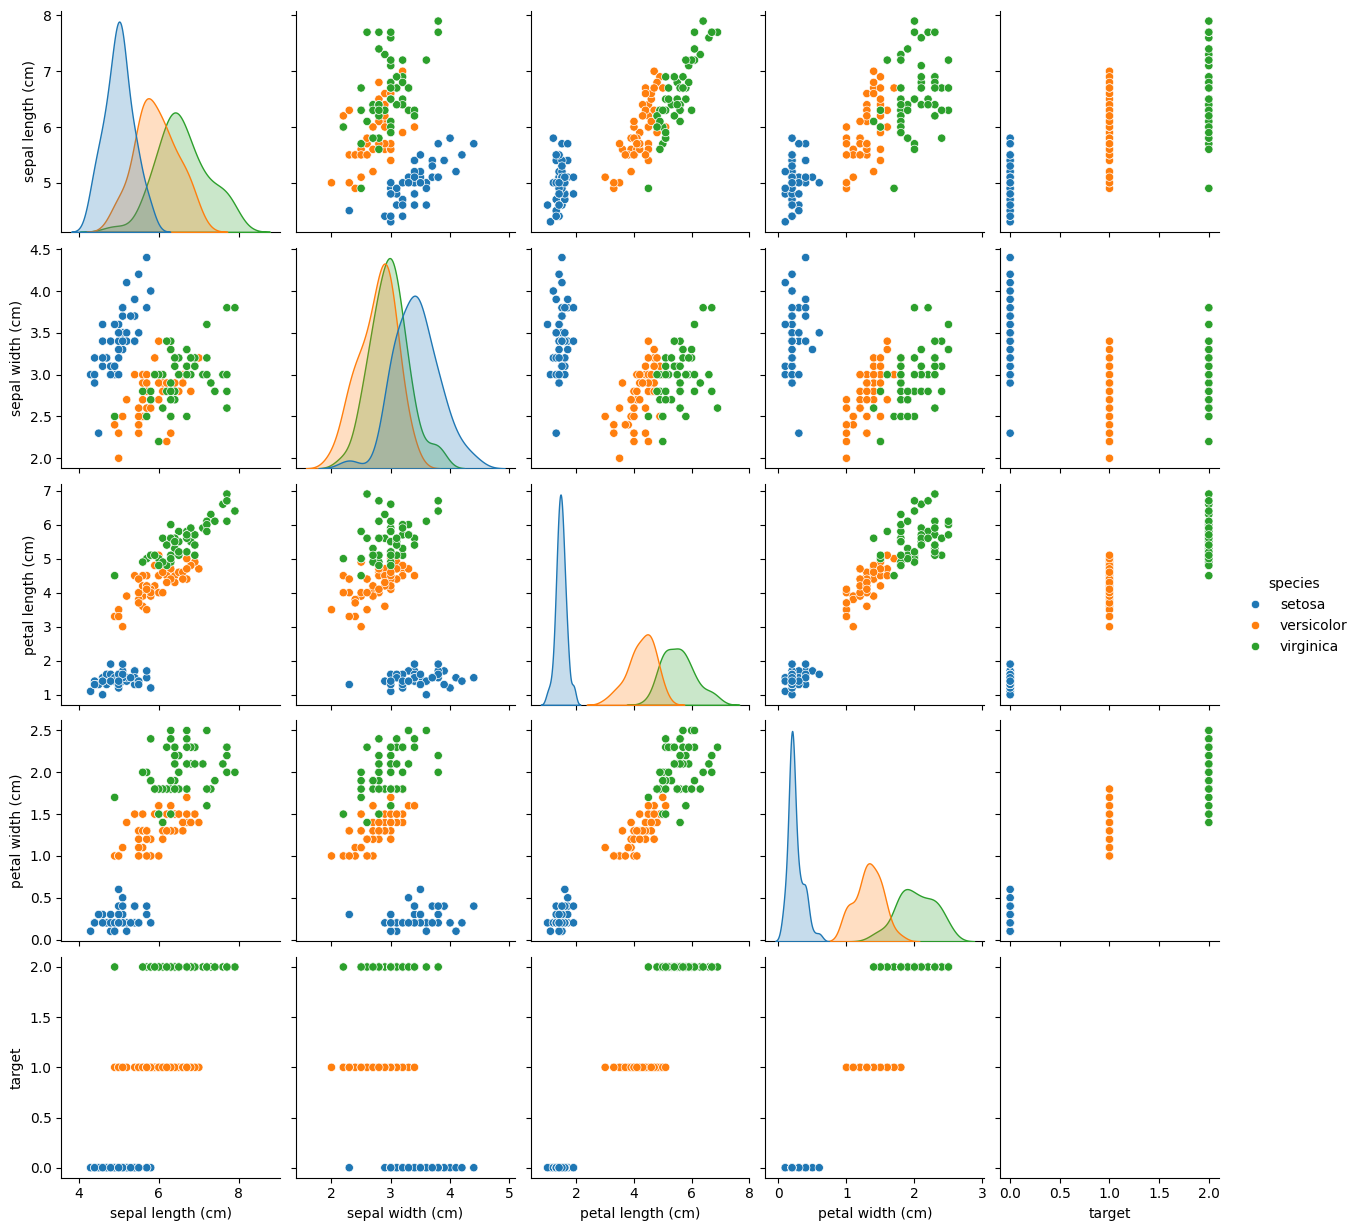

In [9]:
sns.pairplot(df, hue='species')
plt.show()

## X, y 데이터 분할

In [10]:
# X 데이터
X = df.iloc[:,:4]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y=df['target']

## 데이터 전처리

In [12]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### 문자를 숫자형으로 바꾸기
- one-hot encoding
- pd.get_dummies()

In [12]:
# One-Hot Encoding
y=pd.get_dummies(y)
print(y.head())

      0      1      2
0  True  False  False
1  True  False  False
2  True  False  False
3  True  False  False
4  True  False  False


## 학습/테스트 데이터셋으로 분할

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=88,
    stratify=y
)

## 딥러닝 모델 만들기
### 딥러닝 모델 구조 정의
- 출력층의 노드수 3개(setosa, versicolor, verginica), 다항분류
- 활성함수(activation): softmax
- 컴파일(compile): categorical_crossentropy

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.optimizers import Adam

In [16]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일

In [17]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 모델 학습

In [18]:
history=model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=5,
    verbose=0
)

## 모델평가

In [19]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9667 - loss: 0.0823


[0.08231262117624283, 0.9666666388511658]

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

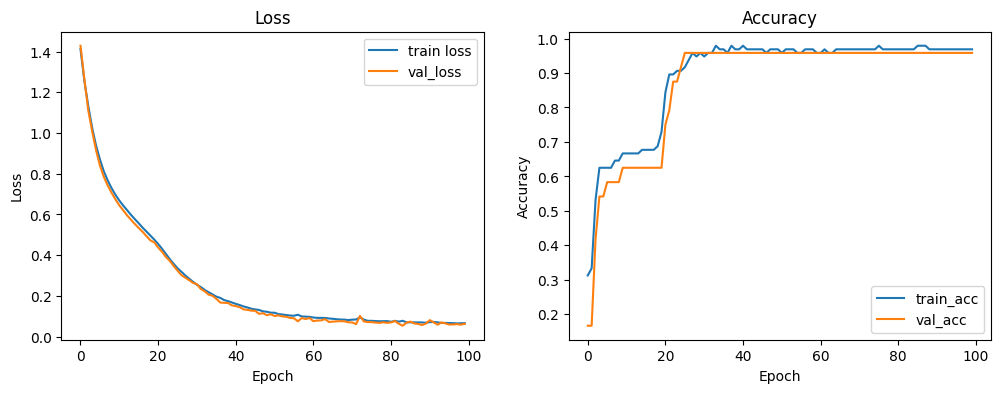

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np

## 예측값을 y값으로 확인하기

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
# 실제값
y_test

92     1
66     1
128    2
126    2
50     1
106    2
74     1
111    2
84     1
20     0
78     1
107    2
143    2
102    2
109    2
24     0
71     1
43     0
42     0
32     0
113    2
5      0
120    2
37     0
34     0
61     1
88     1
15     0
86     1
33     0
Name: target, dtype: int64

In [25]:
# 예측값
y_pred = model.predict(X_test)
y_pred[:3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[6.9692987e-04, 9.9813133e-01, 1.1717963e-03],
       [4.0940545e-03, 9.8479974e-01, 1.1106185e-02],
       [2.2936001e-05, 8.5457861e-03, 9.9143124e-01]], dtype=float32)

In [26]:
np.argmax(y_pred, axis=1)

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

## Confusion Matrix

In [27]:
y_test[:3]

92     1
66     1
128    2
Name: target, dtype: int64

In [28]:
y_pred=model.predict(X_test)
y_pred[:3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[6.9692987e-04, 9.9813133e-01, 1.1717963e-03],
       [4.0940545e-03, 9.8479974e-01, 1.1106185e-02],
       [2.2936001e-05, 8.5457861e-03, 9.9143124e-01]], dtype=float32)

In [30]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# y_true = np.argmax(y_test, axis=1)

cm=confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


## 평가 레포트

In [31]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

